In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [89]:
features = pd.read_csv('pop_features_minmax.csv',index_col=0)
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.042306,0.708680,0.240579,0.553440,0.000000,0.095424,0.804894,0.080418,0.747892,0.323032
1,0.163814,0.835910,0.182291,0.538181,0.000002,0.090141,0.735435,0.180709,0.346432,0.375591
2,0.580902,0.707491,0.223771,0.316427,0.000000,0.076826,0.625268,0.349216,0.175623,0.306213
3,0.149744,0.840666,0.273561,0.360168,0.000000,0.269788,0.593354,0.294596,0.484186,0.457584
4,0.558791,0.749108,0.194427,0.477148,0.000000,0.057698,0.795541,0.028007,0.288917,0.930621


In [81]:
labels = pd.read_csv('pop_labels.csv',index_col=0)
labels.head()

,target
0,1
1,1
2,1
3,1
4,1


In [83]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

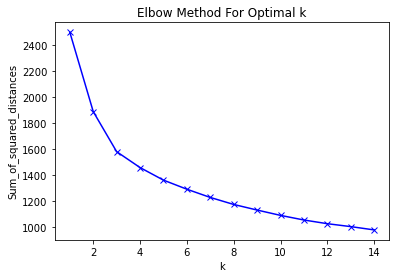

In [84]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [85]:
clustering_kmeans = KMeans(n_clusters=4)
features['cluster'] = clustering_kmeans.fit_predict(features)

In [86]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,0.042306,0.708680,0.240579,0.553440,0.000000,0.095424,0.804894,0.080418,0.747892,0.323032,1
1,0.163814,0.835910,0.182291,0.538181,0.000002,0.090141,0.735435,0.180709,0.346432,0.375591,1
2,0.580902,0.707491,0.223771,0.316427,0.000000,0.076826,0.625268,0.349216,0.175623,0.306213,0
3,0.149744,0.840666,0.273561,0.360168,0.000000,0.269788,0.593354,0.294596,0.484186,0.457584,1
4,0.558791,0.749108,0.194427,0.477148,0.000000,0.057698,0.795541,0.028007,0.288917,0.930621,2


In [47]:
reduced_data = PCA(n_components=2).fit_transform(features)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

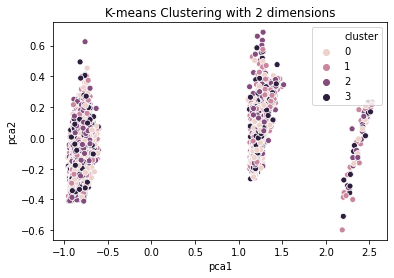

In [87]:
sns.scatterplot(x="pca1", y="pca2", hue=features['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

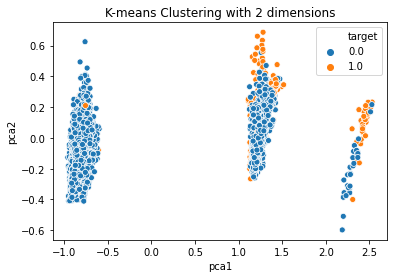

In [88]:
sns.scatterplot(x="pca1", y="pca2", hue=labels['target'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [53]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,genre_A Capella,...,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,cluster
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [56]:
combined = features
combined['target'] = labels['target']

In [57]:
combined.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,genre_A Capella,...,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World,cluster,target
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.816,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.368,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.227,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.390,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0


In [58]:
c0 = combined[combined['cluster']==0]
c1 = combined[combined['cluster']==1]
c2 = combined[combined['cluster']==2]
c3 = combined[combined['cluster']==3]
c4 = combined[combined['cluster']==4]

In [59]:
c0 = c0.drop(['cluster'],axis=1)
c1 = c1.drop(['cluster'],axis=1)
c2 = c2.drop(['cluster'],axis=1)
c3 = c3.drop(['cluster'],axis=1)
c4 = c4.drop(['cluster'],axis=1)

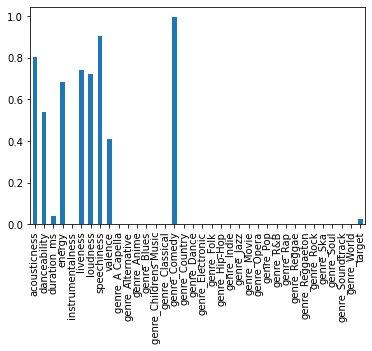

In [68]:
c0.mean().plot(kind='bar')

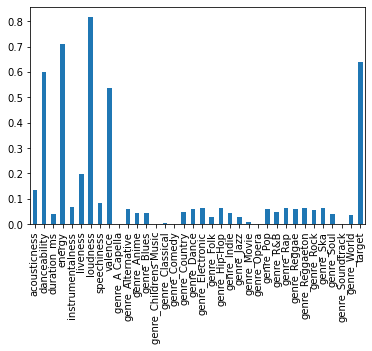

In [69]:
c1.mean().plot(kind='bar')

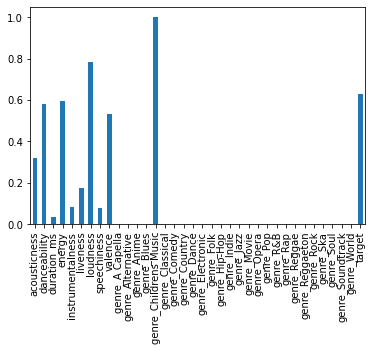

In [70]:
c2.mean().plot(kind='bar')

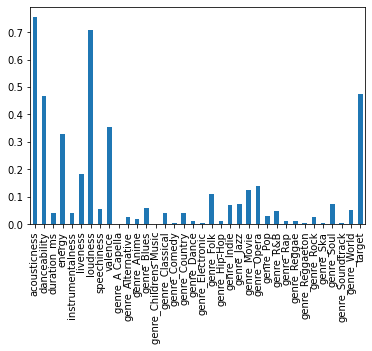

In [63]:
c3.mean().plot(kind='bar')

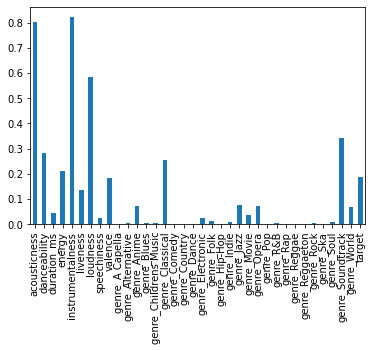

In [64]:
c4.mean().plot(kind='bar')

In [73]:
c1.mean()

acousticness             0.133160
danceability             0.600023
duration_ms              0.039601
energy                   0.712098
instrumentalness         0.068452
liveness                 0.196503
loudness                 0.816688
speechiness              0.083817
valence                  0.536662
genre_A Capella          0.000088
genre_Alternative        0.059185
genre_Anime              0.044951
genre_Blues              0.045910
genre_Childrens Music    0.000000
genre_Classical          0.004569
genre_Comedy             0.001106
genre_Country            0.049703
genre_Dance              0.059866
genre_Electronic         0.062084
genre_Folk               0.029267
genre_Hip-Hop            0.064581
genre_Indie              0.045383
genre_Jazz               0.029442
genre_Movie              0.009101
genre_Opera              0.000000
genre_Pop                0.058541
genre_R&B                0.049073
genre_Rap                0.063930
genre_Reggae             0.060422
genre_Reggaeto